# Importando

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Lendo dados

In [31]:
db = pd.read_csv('statlog-heart-dataset.csv')

db

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,49,1,2,130,266,0,0,171,0,0.6,1,0,3,no
266,52,1,3,172,199,1,0,162,0,0.5,1,0,7,no
267,44,1,2,120,263,0,0,173,0,0.0,1,0,7,no
268,56,0,2,140,294,0,2,153,0,1.3,2,0,3,no


# Train test split

In [32]:
X = db.drop('class', axis=1)
y = db['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

decision_tree.score(X_test, y_test)

0.7407407407407407

# Random Forest

In [34]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test)

0.8042328042328042

# Metricas

In [46]:
# Metrics for Decision Tree

y_pred_dt = decision_tree.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, target_names=['no', 'yes'])
conf_dt = confusion_matrix(y_test, y_pred_dt)

print(report_dt)
print(conf_dt)

              precision    recall  f1-score   support

          no       0.75      0.81      0.78       105
         yes       0.73      0.65      0.69        84

    accuracy                           0.74       189
   macro avg       0.74      0.73      0.73       189
weighted avg       0.74      0.74      0.74       189

[[85 20]
 [29 55]]


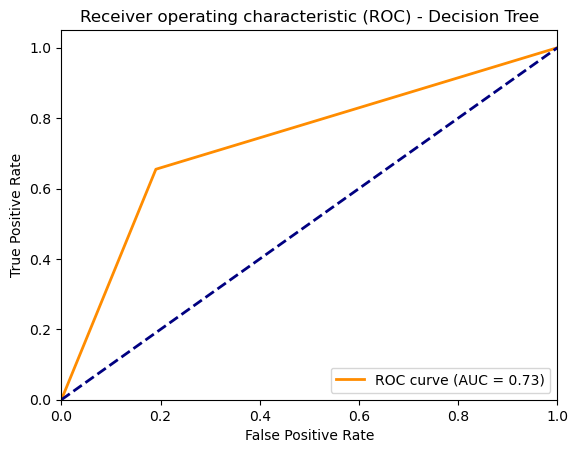

In [52]:
# roc curve metrics
# Obtain predicted probabilities of the positive class
y_scores_dt = decision_tree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dt, pos_label='yes')

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Metrics for Random Forest

y_pred_rf = random_forest.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, target_names=['no', 'yes'])
conf_rf = confusion_matrix(y_test, y_pred_rf)

print(report_rf)
print(conf_rf)

              precision    recall  f1-score   support

          no       0.79      0.88      0.83       105
         yes       0.82      0.71      0.76        84

    accuracy                           0.80       189
   macro avg       0.81      0.80      0.80       189
weighted avg       0.81      0.80      0.80       189

[[92 13]
 [24 60]]


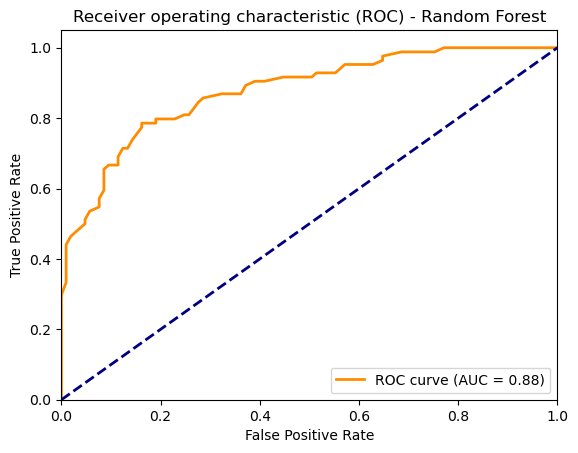

In [53]:
# roc curve metrics
# Obtain predicted probabilities of the positive class
y_scores_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf, pos_label='yes')

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()